In [1]:
import sys
sys.path.append('./code')
from importlib import reload

In [2]:
from config import row_colors, columns_to_names, row_colors_dict

In [3]:
import make_figure4
reload(make_figure4)
from make_figure4 import *
import pickle

goodinds = pickle.load(open('./intermediate_files/goodinds', 'rb'))
merged_clustdict = pickle.load(open('./intermediate_files/merged_clustdict', 'rb'))
merged_inds_to_subset = pickle.load(open('./intermediate_files/merged_inds_to_subset', 'rb'))
cooldict_50kb = pickle.load(open('./intermediate_files/cooldict_50kb', 'rb'))
ind_to_gene = pickle.load(open('./intermediate_files/ind_to_gene', 'rb'))
all_ind_to_region = pickle.load(open('./intermediate_files/all_ind_to_region', 'rb'))
my_treg_comp = pickle.load(open('./intermediate_files/my_treg_comp', 'rb'))

In [4]:
%load_ext autoreload
%autoreload
import scanpy as sc

sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})

plt.rcParams.update({
    'axes.labelsize': 14,       # x and y labels' font size
    'xtick.labelsize': 8,      # x tick labels' font size
    'ytick.labelsize': 8,      # y tick labels' font size
    'axes.titlesize': 14,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'legend.fontsize': 6,      # Legend font size
})
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams.update({
    'axes.labelsize': 8,       # x and y labels' font size
    'xtick.labelsize': 6,      # x tick labels' font size
    'ytick.labelsize': 6,      # y tick labels' font size
    'axes.titlesize': 10,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'xtick.major.pad' : 2,
    'ytick.major.pad' : 2,

})
plt.rcParams['axes.linewidth'] = .25
plt.rcParams['xtick.major.width'] = .25
plt.rcParams['ytick.major.width'] = .25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['grid.linewidth'] = .25

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

In [5]:
from initialize import *
import cooler 

treg_250kb = cooler.Cooler('./Treg_all.mcool::/resolutions/250000')
treg_50kb = cooler.Cooler('./Treg_all.mcool::/resolutions/50000')


(chromsizes, parsed_chroms, region_to_inds, 
    all_region_to_ind, inds_to_region, all_ind_to_region, 
    chrom_to_start, chrom_to_end) = initialize_helper_vars(treg_250kb)

# (_, _, region_to_inds_50kb, all_region_to_ind_50kb, 
#     inds_to_region_50kb, all_ind_to_region_50kb,
#     chrom_to_start_50kb, chrom_to_end_50kb) = initialize_helper_vars(treg_50kb)

In [6]:
gene_to_ind = pickle.load(open('gene_to_ind.p', 'rb'))


In [59]:
all_intra_metadomains = np.load('for_s1/all_intra_metadomains.npy')
rows = []
for i, j in zip(*np.where(np.triu(all_intra_metadomains))):
    row = all_ind_to_region[i] + all_ind_to_region[j]
    rows.append(row)
df = pd.DataFrame(rows)
df.columns = ['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']
df['cluster'] = 'shared'

In [60]:
df1 = df[['chrom1', 'start1', 'end1', 'cluster']].copy()
df2 = df[['chrom2', 'start2', 'end2', 'cluster']].copy()
df1.columns = ['chrom', 'start', 'end', 'cluster']
df2.columns = ['chrom', 'start', 'end', 'cluster']

df1.loc[:, 'ind'] = (df1['start'] // 250_000 + df1['chrom'].apply(lambda x: chrom_to_start[x]))
df2.loc[:, 'ind'] = (df2['start'] // 250_000 + df2['chrom'].apply(lambda x: chrom_to_start[x]))

In [61]:
%autoreload 2
from compute_differential_hic_hub import *
from collections import defaultdict
from make_figure4 import *
import itertools

our_treg_25kb = cooler.Cooler('./Treg_all.mcool::/resolutions/25000')
our_tcon_25kb = cooler.Cooler('./Tconv_all.mcool::/resolutions/25000')

metadomain_pileup_cooldict = {
    'Our_Treg' : our_treg_25kb,
    'Our_Tcon' : our_tcon_25kb,
}
intra_mat_dict = defaultdict(list)
intra_metadata = []
padding_size = 30

intra_all_mat_dict, intra_all_metadata = pileup_direct_bin_pairs(df1, df2, metadomain_pileup_cooldict, 
                                                              {x : y for x, y in chrom_to_start.items()}, 
                                                              None, 
                                                              None, 
                                                              skip_metadomains=True,
                                                              padding_size=padding_size, 
                                                              fetch_oe=True,
                                                              resolution_out = 25_000,
                                                              intra=True,
                                                              inter=False
                                                                )

/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 1


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 7


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 15


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 17


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 4


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 18


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 14


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 9


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 3


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 11


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 12


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 13


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with X


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 2


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 6


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 10


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 8


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 19


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 16


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 5


In [34]:
deseq_effect_mat = np.load('./for_s1/deseq_effect_mat.npy')
deseq_pval_mat = np.load('./for_s1/deseq_pval_mat.npy')

In [74]:
ind1, ind2 = intra_all_metadata['ind1'], intra_all_metadata['ind2']
intra_all_metadata['cluster1'] = (deseq_pval_mat[ind1, ind2] < .05) * np.sign(deseq_effect_mat[ind1, ind2])
intra_all_metadata['cluster2'] = (deseq_pval_mat[ind1, ind2] < .05) * np.sign(deseq_effect_mat[ind1, ind2])
intra_all_metadata['cluster1'] = intra_all_metadata['cluster1'].fillna(0)
intra_all_metadata['cluster2'] = intra_all_metadata['cluster2'].fillna(0)

In [66]:
import matplotlib as mpl

columns_to_names = {
    1 : 'Treg Up',
    -1 : 'Treg Down',
    0 : 'NS',
}

In [173]:
plt.rcParams['text.usetex'] = False
# fig_within_cluster.savefig(f'./plots/intra_treg/{key}_within_cluster.pdf', bbox_inches='tight')

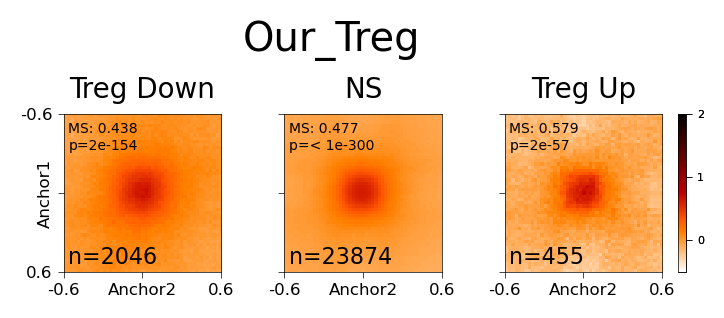

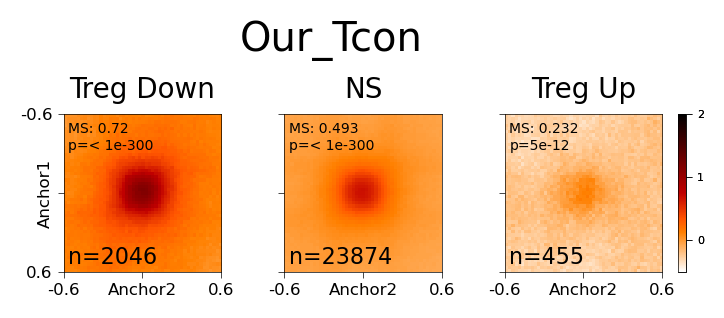

In [82]:
%autoreload 2
from hub_pileup import *

newline = '\n'
all_results_dicts = {}
for key in intra_all_mat_dict:
    (fig_within_cluster), results = plot_cluster_pileups_from_result(key, intra_all_mat_dict, intra_all_metadata,
                                     sorted(intra_all_metadata['cluster1'].unique()),
                                     res = 25_000,
                                     vmax = 2,
                                     vmin = -.5,
                                     columns_to_names = columns_to_names,
                                     row_colors_dict = row_colors_dict,
                                     center = 5, cross_plot = False, s2 = -1,
                                                                     s1 = 6,
                                                                     xspace=1.4,
                                    )
    fig_within_cluster = fig_within_cluster[0]
    fig_within_cluster.suptitle(f"{key}", y=4, x=1.7, ha='center')
    fig_within_cluster.savefig(f'./plots/paper/s11/{key}_within_cluster.pdf', bbox_inches='tight')
    all_results_dicts[key] = results


In [ ]:
from compute_differential_hic_hub import *
ind = 278
key = 'Our_Treg'
fig = plot_ind_pileup_with_clusters(key, clusters, intra_metadata_df, intra_mat_dict, vmin=0, vmax=5)
fig.savefig('./plots/pileups_final/intra_pileup.pdf', bbox_inches='tight')

#### Intrachromosomal by p-value

In [ ]:
%autoreload 2
from hub_pileup import *

import matplotlib as mpl

og_pval = intra_all_metadata['cluster1'].copy()
cutoffs = [20, 22, 25, 30, 40, 80, np.inf]
clusters = pd.cut(og_pval, cutoffs, labels=False)
intra_all_metadata['og_pval'] = og_pval

intra_all_metadata['cluster1'] = clusters
intra_all_metadata['cluster2'] = clusters


In [ ]:

columns_to_names = {}
for c, x in enumerate(cutoffs[:-1]):
    y = cutoffs[c + 1]
    if c == len(cutoffs)-2:
        columns_to_names[c] = f'${{{mpl.rcParams["mathtext.default"] = "regular"}}p < 10^{{-{x}}}}$'
    else:
        columns_to_names[c] = f'${{{mpl.rcParams["mathtext.default"] = "regular"}}10^{{-{y}}} < p < 10^{{-{x}}}}$'

plt.rcParams['text.usetex'] = False

In [ ]:

newline = '\n'
all_results_dicts = {}
for key in intra_all_mat_dict:
    print(key)
    (fig_within_cluster), results = plot_cluster_pileups_from_result(key, intra_all_mat_dict, intra_all_metadata,
                                     sorted(intra_all_metadata['cluster1'].unique()),
                                     res = 25_000,
                                     vmax = 3,
                                     vmin = -.05,
                                     columns_to_names = columns_to_names,
                                     row_colors_dict = row_colors_dict,
                                     center = 5, cross_plot = False, s2 = -1,
                                                                     s1 = 6,
                                                                     xspace=1.4,
                                    )
    fig_within_cluster = fig_within_cluster[0]
    fig_within_cluster.suptitle(f"{key}", y=4, x=1.7, ha='center')
    fig_within_cluster.savefig(f'./plots/intra_treg/{key}_within_cluster.pdf', bbox_inches='tight')
    all_results_dicts[key] = results

### Interchromosomal

In [7]:
df = pd.read_csv('./intermediate_files/inter_metadomain_with_pval.csv', index_col=0,
                )
df.columns = ['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'pval']
df['cluster'] = df['pval']


df1 = df[['chrom1', 'start1', 'end1', 'cluster']].copy()
df2 = df[['chrom2', 'start2', 'end2', 'cluster']].copy()
df1.columns = ['chrom', 'start', 'end', 'cluster']
df2.columns = ['chrom', 'start', 'end', 'cluster']

df1.loc[:, 'ind'] = (df1['start'] // 250_000 + df1['chrom'].apply(lambda x: chrom_to_start[x]))
df2.loc[:, 'ind'] = (df2['start'] // 250_000 + df2['chrom'].apply(lambda x: chrom_to_start[x]))

df1['chrom'] = 'chr' + df1['chrom']
df2['chrom'] = 'chr' + df2['chrom']

In [8]:
bad = (df1['chrom']=='chrX') | (df2['chrom']=='chrX')

df1 = df1[~bad]
df2 = df2[~bad]

In [11]:
%autoreload 2
from hub_pileup import *
from compute_differential_hic_hub import *
from collections import defaultdict
from make_figure4 import *
import itertools

cooldict = {
    'Tn.1' : cooler.Cooler('/Genomics/argo/users/gdolsten/pritlab/mega_tcell_dataset/zoomified_cools/OGYuri.Tn.1.cool::/resolutions/25000'),
    'Tn.2' : cooler.Cooler('/Genomics/argo/users/gdolsten/pritlab/mega_tcell_dataset/zoomified_cools/OGYuri.Tn.2.cool::/resolutions/25000'),
    'Tn.3' : cooler.Cooler('/Genomics/argo/users/gdolsten/pritlab/mega_tcell_dataset/zoomified_cools/OGYuri.Tn.3.cool::/resolutions/25000'),
    'Treg.1' : cooler.Cooler('/Genomics/argo/users/gdolsten/pritlab/mega_tcell_dataset/zoomified_cools/OGYuri.Treg.1.cool::/resolutions/25000'),
    'Treg.2' : cooler.Cooler('/Genomics/argo/users/gdolsten/pritlab/mega_tcell_dataset/zoomified_cools/OGYuri.Treg.2.cool::/resolutions/25000'),
    'Treg.3' : cooler.Cooler('/Genomics/argo/users/gdolsten/pritlab/mega_tcell_dataset/zoomified_cools/OGYuri.Treg.3.cool::/resolutions/25000'),
}

inter_mat_dict = defaultdict(list)
inter_metadata = []
padding_size = 30



inter_all_mat_dict, inter_all_metadata = pileup_direct_bin_pairs(df1, df2, cooldict, 
                                                              {'chr' + x : y for x, y in chrom_to_start.items()}, 
                                                              None, 
                                                              None, 
                                                              skip_metadomains = True,
                                                              padding_size=padding_size, 
                                                              fetch_oe=True,
                                                              resolution_out = 25_000,
                                                              intra=False,
                                                              inter=True
                                                                )

113 (113,)
Done with chr8
21 (21,)
Done with chr8
77 (77,)
Done with chr8
45 (45,)
Done with chr8
100 (100,)
Done with chr8
135 (135,)
Done with chr8
53 (53,)
Done with chr8
103 (103,)
Done with chr8
87 (87,)
Done with chr8
57 (57,)
Done with chr8
60 (60,)
Done with chr8
110 (110,)
Done with chr8
69 (69,)
Done with chr8
49 (49,)
Done with chr8
76 (76,)
Done with chr8
78 (78,)
Done with chr8
53 (53,)
Done with chr8
30 (30,)
Done with chr8
113 (113,)
Done with chr10
47 (47,)
Done with chr10
35 (35,)
Done with chr10
27 (27,)
Done with chr10
71 (71,)
Done with chr10
89 (89,)
Done with chr10
50 (50,)
Done with chr10
105 (105,)
Done with chr10
67 (67,)
Done with chr10
49 (49,)
Done with chr10
49 (49,)
Done with chr10
68 (68,)
Done with chr10
56 (56,)
Done with chr10
24 (24,)
Done with chr10
40 (40,)
Done with chr10
35 (35,)
Done with chr10
25 (25,)
Done with chr10
35 (35,)
Done with chr10
21 (21,)
Done with chr1
47 (47,)
Done with chr1
18 (18,)
Done with chr1
25 (25,)
Done with chr1
48 (48,)

In [26]:
og_pval = inter_all_metadata['cluster1'].copy()
cutoffs = [5, 5.5, 6, 7,  np.inf]
clusters = pd.cut(og_pval, cutoffs, labels=False)

inter_all_metadata2 = inter_all_metadata.copy()
inter_all_metadata2['og_pval'] = og_pval
inter_all_metadata2['cluster1'] = clusters
inter_all_metadata2['cluster2'] = clusters

In [27]:
import matplotlib as mpl

# Set the mathtext default to regular
mpl.rcParams["mathtext.default"] = "regular"

columns_to_names = {}
for c, x in enumerate(cutoffs[:-1]):
    y = cutoffs[c + 1]
    if c == len(cutoffs) - 2:
        columns_to_names[c] = f'$p < 10^{{-{x}}}$'
    else:
        columns_to_names[c] = f'$10^{{-{y}}} < p < 10^{{-{x}}}$'


/Genomics/pritykinlab/gabe/jupys/tregs/./code/compute_differential_hic_hub.py:75: RuntimeWarning: Mean of empty slice
  v_middle = np.nanmean(ms_treg[:, inside_filt], axis=1)
/Genomics/pritykinlab/gabe/jupys/tregs/./code/compute_differential_hic_hub.py:76: RuntimeWarning: Mean of empty slice
  v_outside = np.nanmean(ms_treg[:, outside_filt], axis=1)
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hub_pileup.py:407: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([-cutoff, "Anchor1", cutoff])


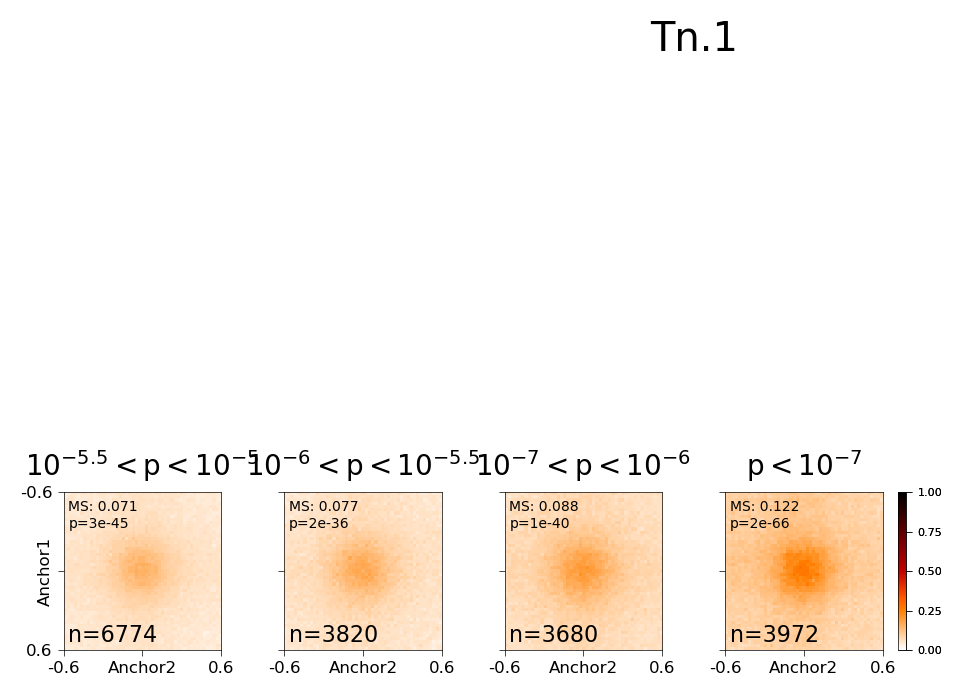

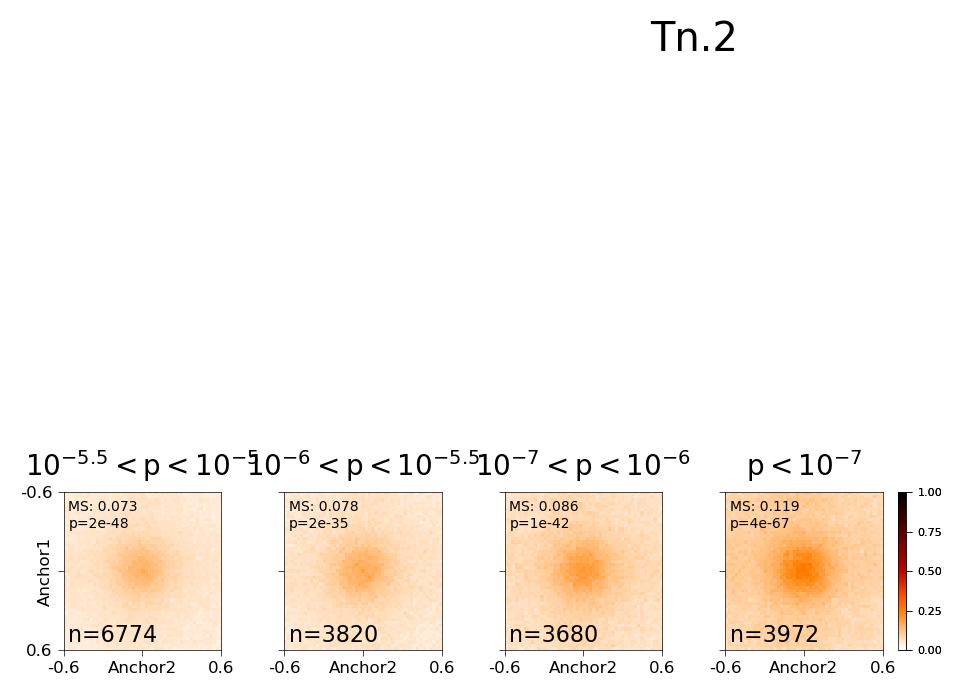

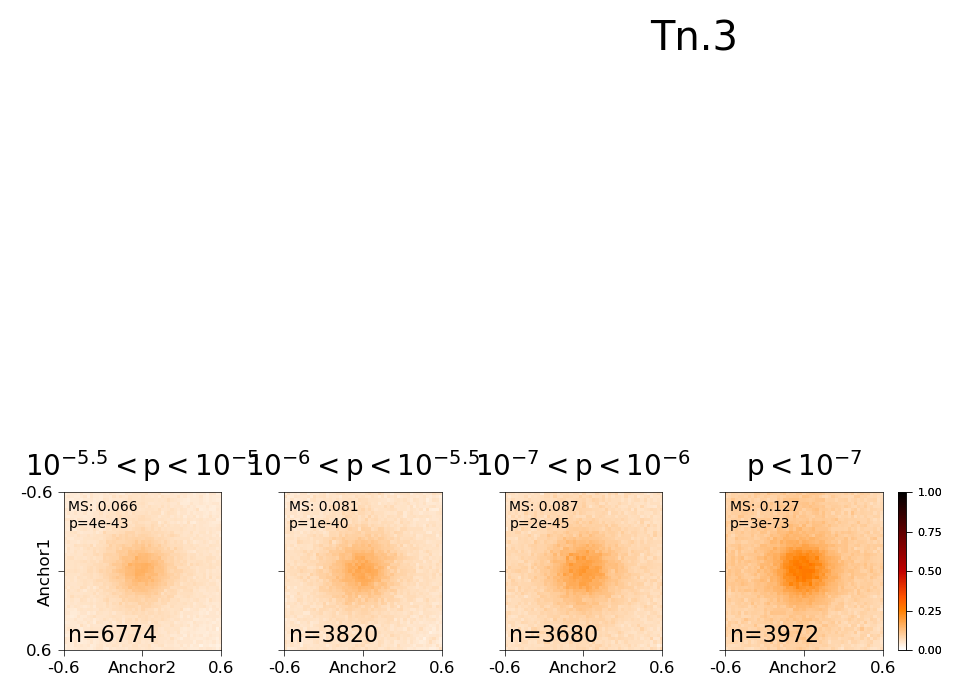

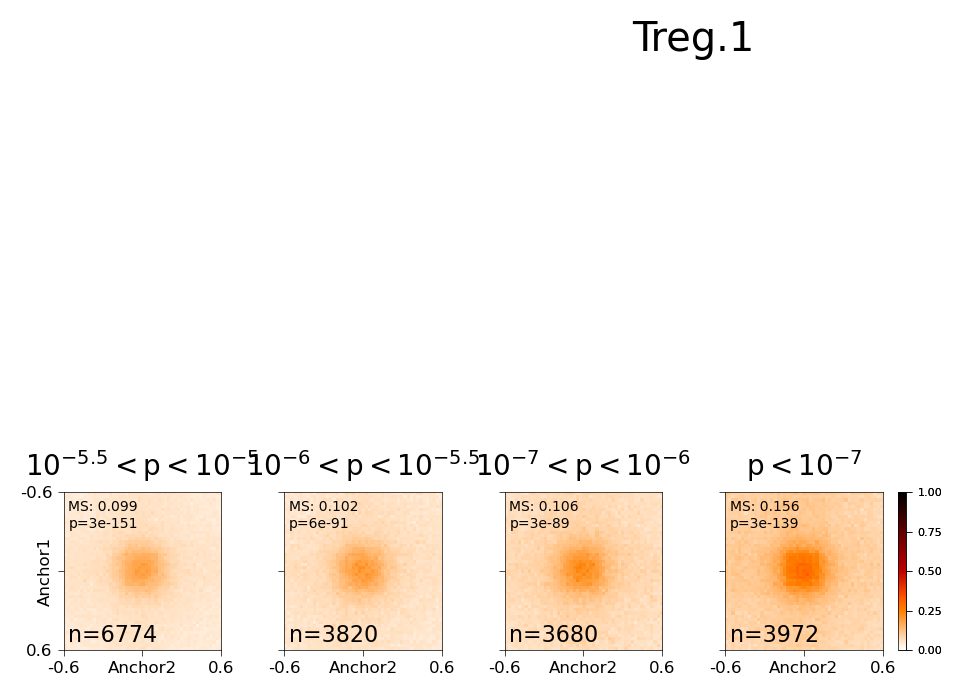

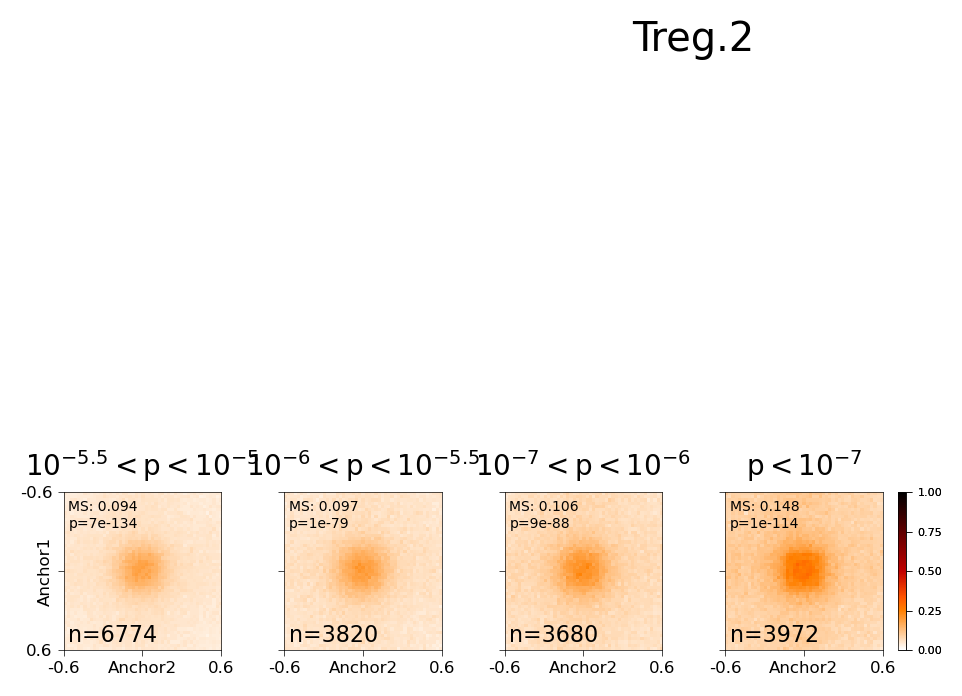

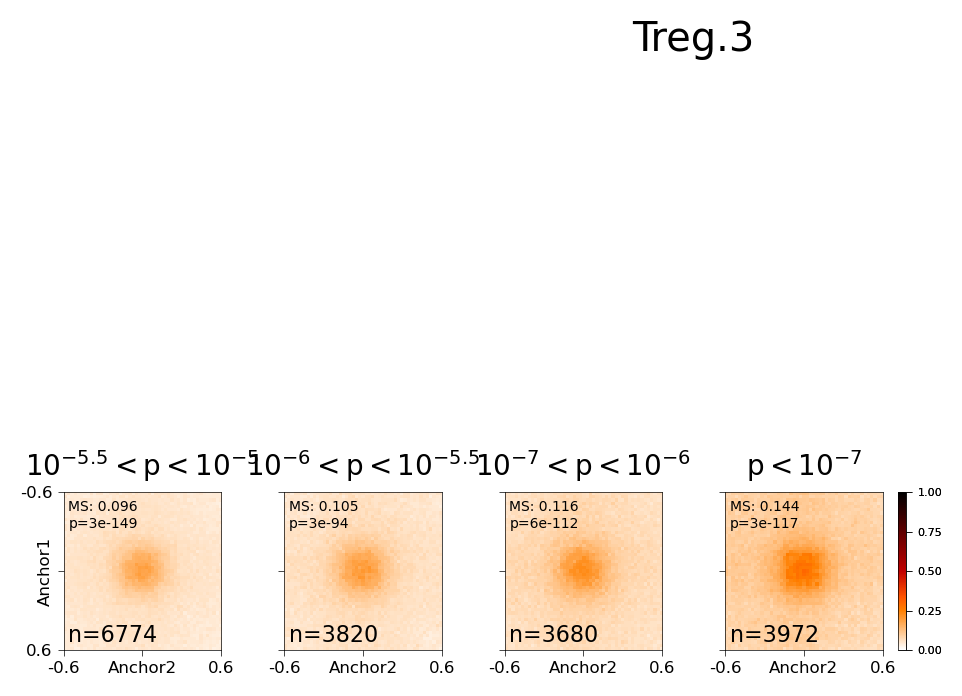

In [29]:
%autoreload 2
from hub_pileup import *

newline = '\n'
all_results_dicts = {}
for key in inter_all_mat_dict:
# for key in ['Treg.1']:
    (fig_within_cluster), results = plot_cluster_pileups_from_result(key, inter_all_mat_dict, inter_all_metadata2,
                                     sorted(inter_all_metadata2['cluster1'].unique()),
                                     res = 25_000,
                                     vmax = 1,
                                     vmin = 0,
                                     columns_to_names = columns_to_names,
                                     row_colors_dict = row_colors_dict,
                                     center = 5, cross_plot = False, 
                                                                     s2 = -1,
                                                                     s1 = 6,
                                                                     xspace=1.4,
                                    )
    fig_within_cluster = fig_within_cluster[0]
    fig_within_cluster.suptitle(f"{key}", y=7.6, x=4, ha='center')
    fig_within_cluster.savefig(f'./plots/paper/s14/{key}_interchromosomal_pileup.pdf', bbox_inches='tight')
    all_results_dicts[key] = results